
# Project: Investigate a Dataset: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from over one hundred thousand medical appointments in Brazil and is focused on the question of whether or not patients showed up for their appointment. A number of characteristics about the patient are included in each row.


### Dataset Description 

The variables contained in this dataset are:

1.PatientId:The identification of patient

2.AppointmentID: Identification of appointment

3.Gender:F=female, M= male	

4.ScheduledDay:The day the apointment was booked

5.AppointmentDay:The actual day to go for the medical appointment

6.Age: How old is the patient	

7.Neighbourhood:Indicates the location of the hospital.

8.Scholarship:Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.	

9.Hypertension:'Zero' If a person dont have and 'one' if a person has

10.Diabetes:'Zero' If a person is not diabetic and  'one'  if a person is diabetic	

11.Alcoholism:'Zero' if a person is not 'one' if a person is alchoholic	

12.Handicap: 'Zero' if a person  is not handicapped and 'one' if a person is

13.SMS_received:If a person received an sms reminder or not	

14.No-show:  it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.




### Question(s) for Analysis

1.Does gender affect attendance to appointment?(who booked for appointment more and  who showed up for appointment more?)

2.Does  enrollement in the Brasilian welfare program Bolsa Família  likely to influence attendance to appointments?

3.Can a conclusion be drawn that people with a health condition like hypertension will keep their appointment more?

4.Does neighborhood influence attendance to appointment?




In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

 **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties


In [2]:
#load data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


In [3]:
#checking the first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#checking the number of rows and columns
df.shape


(110527, 14)

This dataset has 110527 patients and 14 columns

In [5]:
#the datatypes of the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#checking if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing data, all columns contains the number of entries(110527)

In [7]:
#Checking for duplicate data

sum(df.duplicated())

0

There are no duplicates in this dataset

In [8]:
#unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
> 

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In the age column the minimum age is -1 and it is not possible for someone to be of age -1, so we would drop the row that contains the age value of -1.

In [10]:
#unique values in the age column
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [11]:
#looking for the row with age -1
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
#dropping the row with index number 99832 above
df.drop(99832, inplace=True)

In [13]:
#dropping some columns that would not be useful
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [14]:
#the new shape would be
df.shape



(110526, 10)

The dataset now contains 110526 rows and 10 columns

In [15]:
# describing the dataset again
df.describe()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
#Renaming some columns
df.rename(columns={'No-show':'no_show','Gender':'gender','Age':'age','Scholarship':'scholarship','Hipertension' :'hypertension' , 'Diabetes' : 'diabetes','Handcap': 'handicap'},inplace=True)

In [17]:
#checking the new column labels
df.head(1)

,gender,age,Neighbourhood,scholarship,hypertension,diabetes,Alcoholism,handicap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [18]:
#changing the values of the no_show column
df['no_show']= df['no_show'].map({'Yes':0, 'No':1})

In the no_show column, 

1 represents people that showed up for their appointments

0 represents people that did not show up for their appointments



In [19]:
#checking the new datatype of the no_show column
type(df['no_show'][0])

numpy.int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Does gender affect attendance to appointment?

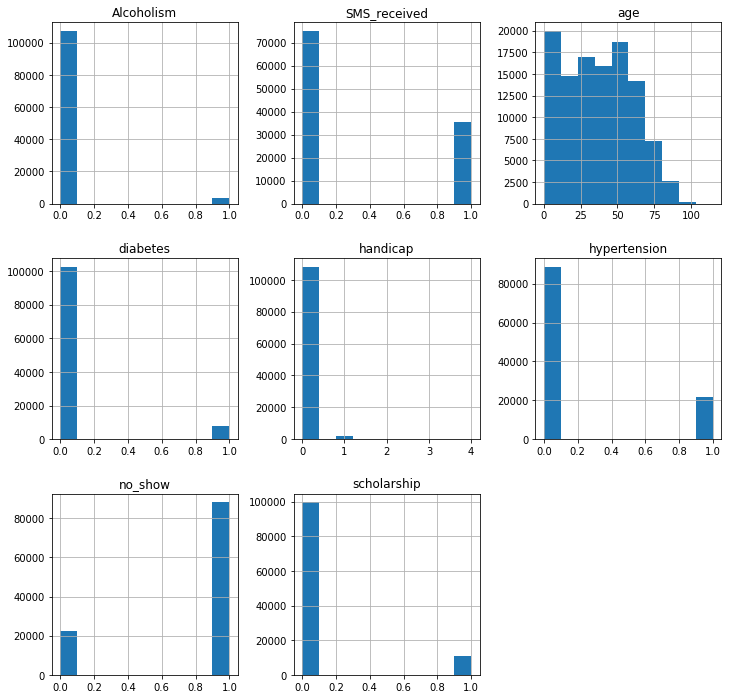

In [20]:
#checking the distribution of data in each column
df.hist(figsize=(12,12));

In [21]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

From the data 71839 patients are females and 38687 are males.

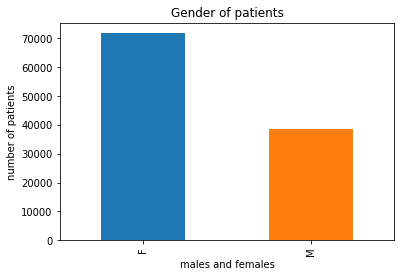

In [22]:
#number of males and female patients represented in a bar chart
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender of patients')
plt.xlabel('males and females')
plt.ylabel('number of patients')
plt.show();

In [23]:
#percentage of patients by gender
print(round(df['gender'].value_counts()/len(df)*100))

F    65.0
M    35.0
Name: gender, dtype: float64


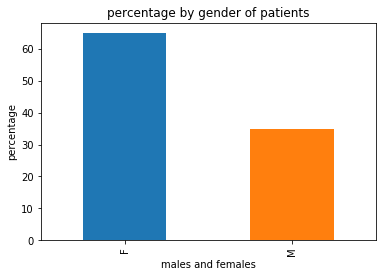

In [24]:
#percentage of patients by gender represented in a bar chart
round(df['gender'].value_counts()/len(df)*100).plot(kind= 'bar')
plt.title('percentage by gender of patients')
plt.xlabel('males and females')
plt.ylabel('percentage')
plt.show();

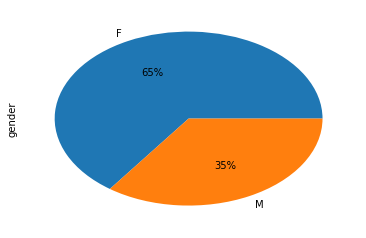

In [25]:
# representing the percentage of gender distribution in a pie chart
round(df['gender'].value_counts()/len(df)*100).plot(kind= 'pie', autopct='%1.0f%%')

 65% of the patients are females and 35% are males.

In [26]:
#lets create a new data frame called df_f that contains female patients

df_f =df[df['gender']== 'F']
df_f.head()

,gender,age,Neighbourhood,scholarship,hypertension,diabetes,Alcoholism,handicap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,76,REPÚBLICA,0,1,0,0,0,0,1


Hint: In the no_show column;
0 stands for people that did not show up for their appointment

1 stands for people that showed up for their apppointment

In [27]:
#number of female patients the showed up for appointment and did not show up for appointment
df_f['no_show'].value_counts()

1    57245
0    14594
Name: no_show, dtype: int64

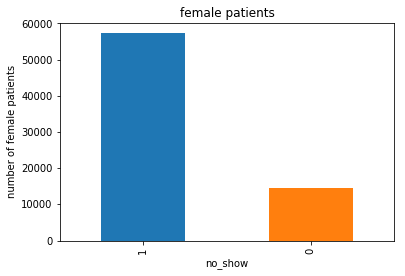

In [28]:
#number of female patients that showed up and did not show up for their appointment represented in a bar chart
df_f['no_show'].value_counts().plot(kind= 'bar')
plt.title('female patients')
plt.xlabel('no_show')
plt.ylabel('number of female patients')
plt.show();

In [29]:
#percentage based on number of females that showed up for their appointment or not 
round(df_f['no_show'].value_counts()/len(df_f)*100)

1    80.0
0    20.0
Name: no_show, dtype: float64

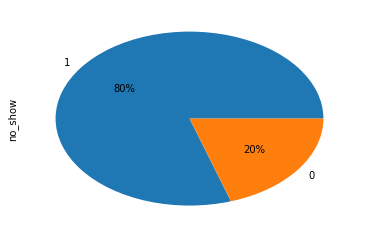

In [30]:
#pie chart showing the attendance to appointment by females in percentages
round(df_f['no_show'].value_counts()/len(df_f)*100).plot(kind='pie', autopct='%1.0f%%')

 80% of female in the dataset showed up for their appointment and

20% of female did not show up for their appointment

In [31]:
#Creating a dataset called df_m that contains male patients
df_m =df[df['gender']== 'M']


In [32]:
df_m.head(1)

,gender,age,Neighbourhood,scholarship,hypertension,diabetes,Alcoholism,handicap,SMS_received,no_show
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1


In [33]:
df_m['no_show'].value_counts()


1    30962
0     7725
Name: no_show, dtype: int64

38687 patients are males. 30962 males showed up for their appointment, 7725 males did not show up

Text(0,0.5,'number of male patients')

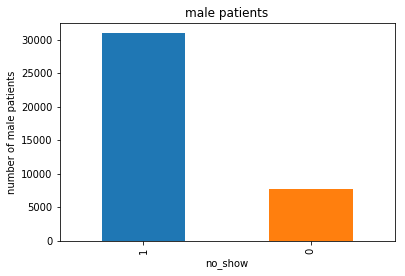

In [34]:
# creating a function that calls no_show appointment of male patients
def appoint(value):
    appoint=df_m['no_show'].value_counts()
    return appoint
value = appoint('No-show')
value.plot(kind = 'bar')
plt.title('male patients')
plt.xlabel('no_show')
plt.ylabel('number of male patients')

In [35]:
#percentage based on number of males that showed up for their appointment or not 
round(df_m['no_show'].value_counts()/len(df_m)*100)

1    80.0
0    20.0
Name: no_show, dtype: float64

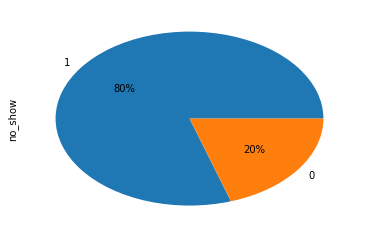

In [36]:
#percentage based on number of males that showed up for their appointment or not represented in a pie chart
round(df_m['no_show'].value_counts()/len(df_m)*100).plot(kind='pie', autopct='%1.0f%%')


 80% of male in the dataset showed up for their appointment and

 20% of male did not show up for their appointment

In [37]:
#summarizing them together
df['no_show'].groupby(df['gender']).value_counts()

gender  no_show
F       1          57245
        0          14594
M       1          30962
        0           7725
Name: no_show, dtype: int64

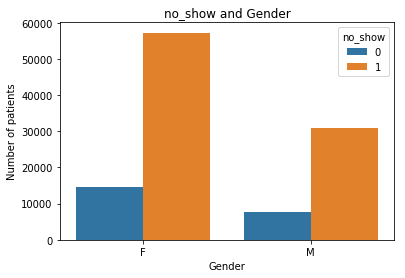

In [38]:
#attendance to appointment and not attendance by males and females represented in a bar chart
sns.countplot(x=df['gender'], hue=df['no_show']);
plt.title('no_show and Gender')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

Question summary

Females scheduled appointment more than males.

The proportion of females and males that showed up and did not show up for their appointment is the same( 80% and 20% respectively). Gender does not affect attendance to appointment.

### Research Question 2 : Does  enrollement in the Brasilian welfare program Bolsa Família  likely to influence attendance to appointments.

In [39]:
#unique values in scholarship column
df['scholarship'].unique()

array([0, 1])

Hint:

0 stands for patients without scholarship 

1 stands for patient with scholarship

In [40]:
# number of people with and without scholarship
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

99665 persons were not enrolled in the scholarship

10861 persons were enrolled in the scholarship.

In [41]:
#grouping those with and without scholarship by attendance or non attendance
df['scholarship'].groupby(df['no_show']).value_counts()

no_show  scholarship
0        0              19741
         1               2578
1        0              79924
         1               8283
Name: scholarship, dtype: int64

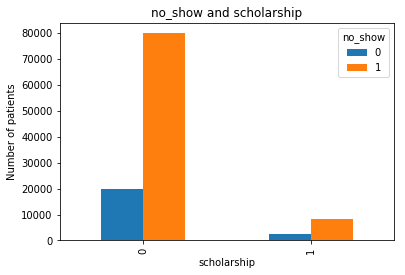

In [42]:
#attendance to appointment and scholarship represented in a bar chart
df.groupby(['scholarship']).no_show.value_counts().unstack().plot(kind='bar')
plt.title('no_show and scholarship')
plt.xlabel('scholarship')
plt.ylabel('Number of patients');



99665 persons are not enrolled in the scholarship but 79924 of them showed up for th appointment

10861 persons are enrolled in the scholarship and 8286 of them showed up for the appointment

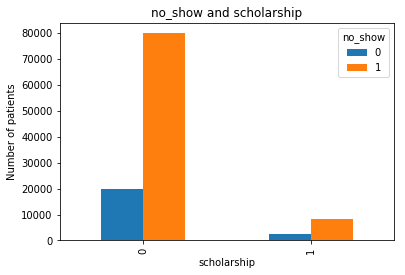

In [43]:
#creating a function of groupby and value counts of variables
def schondnoshow(value):
    schondnoshow = df.groupby(['scholarship']).no_show.value_counts().unstack().plot(kind='bar')
    return schondnoshow
value = schondnoshow('scholarship')
plt.title('no_show and scholarship')
plt.xlabel('scholarship')
plt.ylabel('Number of patients');

In [44]:
#dataframe containing people with scholarship
scho= df[df['scholarship']== 1]

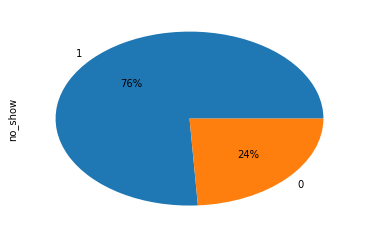

In [45]:
#percentage of people with scholarship that attended appointment in a pie chart
round(scho['no_show'].value_counts()/len(scho)*100).plot(kind='pie', autopct='%1.0f%%')



76% of people not enrolled in the scholarship programme attended their appointment

In [46]:
#datafreame of people without scholarship
no_scho= df[df['scholarship']== 0]

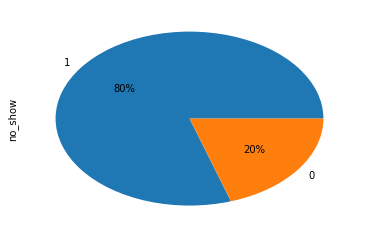

In [47]:
#percentage of people without scholarship that attended appointment in a pie chart
round(no_scho['no_show'].value_counts()/len(no_scho)*100).plot(kind='pie', autopct='%1.0f%%')

80% of people not enrolled in the scholarship programme attended their appointment

Summary

Scholarship do not necessarily influence attendance to appointments since 80% of people without scholarship attended their

appointments.

### Research Question 3 Can a conclusion be drawn that people with a health condition like hypertension will keep their appointment more?

In [48]:
#unique values of hypertension
df['hypertension'].unique()

array([1, 0])

Hint:
1 represents patients with hypertenssion

0 represents patients without hypertension

In [49]:
#value counts of hypertension
df['hypertension'].value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

88725 persons are not hypertensive

21801 persons arehypertensive

In [50]:
#number of patients who are hypertensive and kept their appointment and who are not that also kept their appointment
df['no_show'].groupby(df['hypertension']).value_counts().unstack()

no_show,0,1
hypertension,,
0,18547,70178
1,3772,18029


19.7% of pateints are hypertensive

80% of patients are not hypertensive

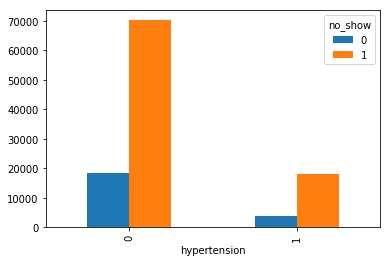

In [51]:
#number of patients who are hypertensive and kept their appointment and who are not 
#that also kept their appointment represented in a bar chart
df['no_show'].groupby(df['hypertension']).value_counts().unstack().plot(kind='bar')

21801 patients are hypertensive and 18029 attended their appointment

88725 are not hypertensive and 70178 kept their appointment.


In [52]:
#datafreame of people without hypertension
no_hype= df[df['hypertension']== 0]

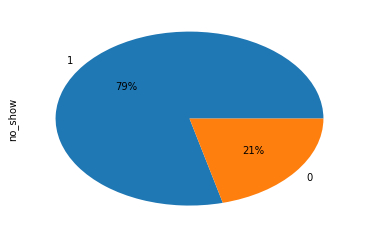

In [53]:
#percentage of people without hypertension that attended appointment in a pie chart
round(no_hype['no_show'].value_counts()/len(no_hype)*100).plot(kind='pie', autopct='%1.0f%%')

79% of people without hypertension showed up for their appointment

In [54]:
#datafreame of people with hypertension
hype= df[df['hypertension']== 1]

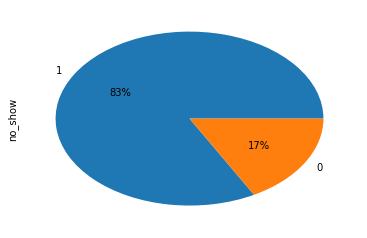

In [55]:
#percentage of people with hypertension that attended appointment in a pie chart
round(hype['no_show'].value_counts()/len(hype)*100).plot(kind='pie', autopct='%1.0f%%')

83% of people with hypertension showed for their appointment.

Summary

People with hypertension tend to attend appointment more than those without hypertension based on the percentage of people with hypertension that attended appointment and those without hypertension that did not.

### Research Question 4.Does neighborhood influence attendance to appointment?

In [56]:
#unique values of neighbourhood
df['Neighbourhood'].nunique()

81

there are 81 unique neighbourhood in this dataset.

In [57]:
#value counts of attendance to appointment groupedby neighbourhood
df.groupby('Neighbourhood').no_show.value_counts()

Neighbourhood        no_show
AEROPORTO            1             7
                     0             1
ANDORINHAS           1          1741
                     0           521
ANTÔNIO HONÓRIO      1           221
                     0            50
ARIOVALDO FAVALESSA  1           220
                     0            62
BARRO VERMELHO       1           332
                     0            91
BELA VISTA           1          1523
                     0           384
BENTO FERREIRA       1           665
                     0           193
BOA VISTA            1           254
                     0            58
BONFIM               1          2223
                     0           550
CARATOÍRA            1          1974
                     0           591
CENTRO               1          2631
                     0           703
COMDUSA              1           254
                     0            56
CONQUISTA            1           689
                     0           160
CONSOLAÇÃ

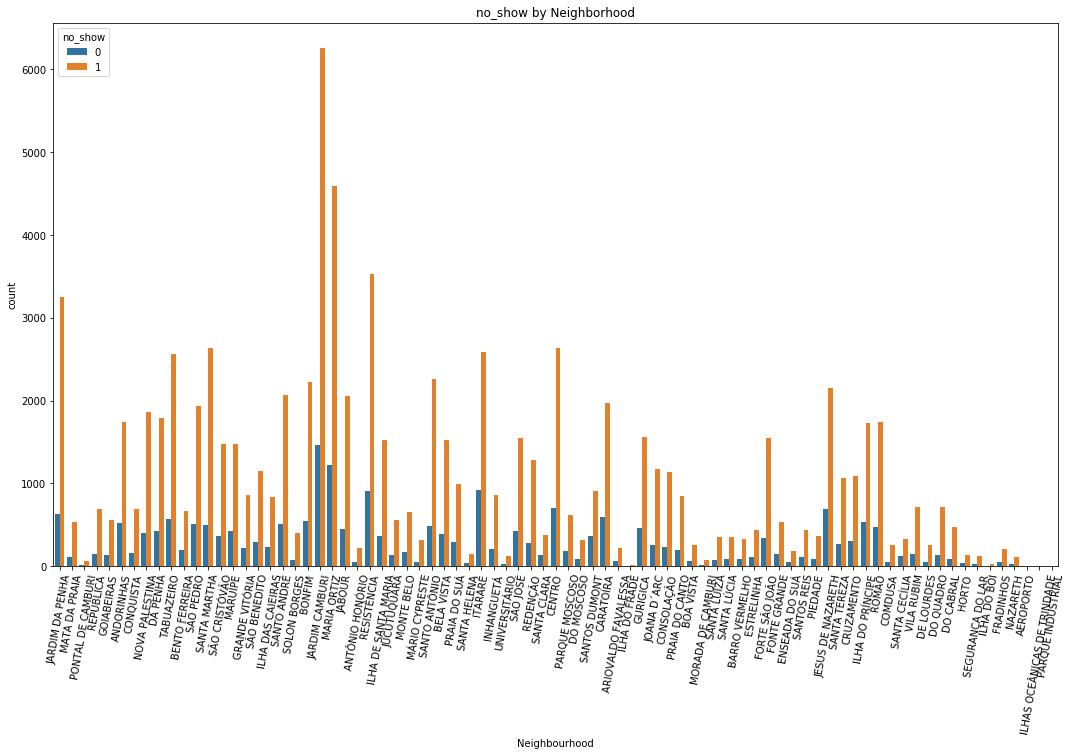

In [58]:
plt.figure(figsize=(18,10))
sns.countplot(x=df.Neighbourhood, hue=df['no_show']);
plt.title('no_show by Neighborhood')
plt.xticks(rotation=80);

from the figure above, some neighbourhood recorded more patients that showed up for appointment than others.

<a id='conclusions'></a>
## Conclusions

From the data analysis above we can conclude that

1.Gender do not affect attendance to appointment since the percentage of men that showed up after booking an appointment and the percentage of women that showed up after booking an appointment are equal.

2.There are more females than male that scheduled an appointment

3.Scholarship is not the determinant factors for showing up for appointment because many patients who are not enrolled in the scholarship showed up for their appointments.

4.People who are hypertensive(83%) kept thier appointment more than those person who are not hypertensive(79%). We can conclude that people who are hypertensive will keep their appointment more. Also, It is possible for other factors to influence their keeping of appointment like neighbourhood etc.

5.Neighbourhood influece attendance to appointments. Some neighnourhood recorded more patients that showed up for appointment than others but this can be as a result of more persons scheduling appointments in this neighbourhood.


 



## Limitations

1.We could not show strong correlations between variables because most data given were categorical variables

2.Further analysis might be required.


### References

Kaggle.com

Stackoverflow.com

Towardsdatascience.com

## Submitting your project

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0